<a href="https://colab.research.google.com/github/isaacthorburn/ELEC4630/blob/main/Copy_of_Dlib_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ELEC4630 Exercise on Face Recognition
First check if the dlib library is installed

In [1]:
!pip install dlib


Mount Google Drive

In [2]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Get some sample images from gitHub and place them a folder called 'images'.

In [ ]:
# First store some sample images in the folder 'images'
!mkdir -p images
!cd images; wget -nc /content/drive/MyDrive/CalTechfaces/image_0001.jpg
!cd images; wget -nc https://raw.githubusercontent.com/isaacthorburn/ELEC4630/main/Faces/image_0023.jpg
!cd images; wget -nc https://raw.githubusercontent.com/isaacthorburn/ELEC4630/main/Faces/image_0100.jpg

/content/drive/MyDrive/CalTechfaces/image_0001.jpg: Scheme missing.
File ‘image_0023.jpg’ already there; not retrieving.

--2021-05-20 23:45:41--  https://raw.githubusercontent.com/isaacthorburn/ELEC4630/main/Faces/image_0100.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-05-20 23:45:42 ERROR 404: Not Found.



Now install the face recognition module from Dlib

In [3]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 96kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=668b7b382ddc62f512a47a8756aa7bc74e78c5adc157ac614a08c19add24f256
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


Now lets find some faces!

In [ ]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("drive/MyDrive/CalTechfaces/image_0001.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("images/image_0023.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("drive/MyDrive/CalTechfaces/image_0002.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print("The Array is: ", face_distances) #printing the array
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
# pil_image.show()  does not work in iPython
display(pil_image)

# You can also save a copy of the new image to disk if you want by uncommenting this line
# pil_image.save("image_with_boxes.jpg")

The Array is:  [0.15656968 0.75128616]


TypeError: ignored

Trying to iterate over images

In [14]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np
import os

# Load pass port picture and learn how to recognize it.
PPimage = face_recognition.load_image_file("/content/drive/MyDrive/Images/PPimage.jpg")
PP_face_encoding = face_recognition.face_encodings(PPimage)[0]


scores = np.array([1])
CurrentImage = face_recognition.load_image_file("/content/drive/MyDrive/Images/PPimage.jpg")
Current_face_encoding = face_recognition.face_encodings(CurrentImage)[0]
face_distances = face_recognition.face_distance(PP_face_encoding, Current_face_encoding)
scores = 1 - face_distances
print("Scores: ", scores) #printing the array


directory = '/content/drive/MyDrive/Images/CalTechfaces'
imgno = 1
scores = np.array([1])
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        CurrentImage = face_recognition.load_image_file("/content/drive/MyDrive/Images/PPimage.jpg")
        #Current_face_encoding = face_recognition.face_encodings(PPimage)[0]
        #face_distances = face_recognition.face_distance(PP_face_encoding, Current_face_encoding)
        #scores = 1 - face_distances
        imgno = imgno + 1
        scores = np.append(scores, imgno)
        continue
    else:
     continue

print("Number of files: ", imgno) #printing the array
print("Scores: ", scores) #printing the array

AxisError: ignored

Lets try to get an ROC curve working

The fpr is:  [0.  0.  0.5 0.5 1. ]
The tpr is:  [0.  0.5 0.5 1.  1. ]
The thresholds is:  [1.8  0.8  0.4  0.35 0.1 ]


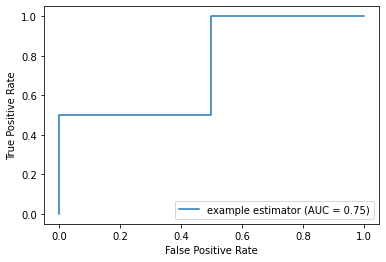

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr
print("The fpr is: ", fpr) #printing the array
tpr
print("The tpr is: ", tpr) #printing the array
thresholds
print("The thresholds is: ", thresholds) #printing the array
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()  

